In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import random
import string
from itertools import product
from google.colab import files
from collections import defaultdict

In [ ]:
WEIGHT_SCALE = {
    'purple': 5,
    'blue': 10,
    'green': 15,
    'orange': 20,
    'red': 25
}
lower = 5
upper = 10

In [ ]:
def getDims():
    return (2*random.randint(lower, upper), 2*random.randint(lower, upper))


def getPlaceList(x, y, n):
    zones = []
    for i in range(n):
        coords = []
        while True:
            coords = [2*random.randint(0, x//2 - 1), 2*random.randint(0, y//2 - 1)]
            if coords not in zones:
                zones.append(coords)
                break

    for i in range(n):
        color = random.choice(list(WEIGHT_SCALE.keys()))
        weight = WEIGHT_SCALE[color]
        zones[i].extend([2, 2, color, weight])
        zones[i] = tuple(zones[i])

    return zones


In [ ]:
map_width, map_height = getDims()
zones = getPlaceList(map_width, map_height, random.randint(5, min(map_width//2, map_height//2)))
labels = random.sample(string.ascii_uppercase, len(zones))

In [ ]:
w = map_width
h = map_height

In [ ]:
r = map_width
c = map_height
peeps_lim = (r*c) * 3
density_lim = peeps_lim // 10
m = []

for i in range(r):
  m.append([])
  for j in range(c):
    m[i].append([])

for i in range(peeps_lim):
  x = 0; y = 0
  while True:
    x = random.randint(0, r//2 - 1) * 2
    y = random.randint(0, c//2 - 1) * 2

    if len(m[x][y]) <= density_lim:
      break
  a = 0
  b = 0
  repeated = True

  while repeated:
    a = random.randint(x*10+2, x*10+18) / 10
    b = random.randint(y*10+2, y*10+18) / 10
    if (a, b) in m[x][y]:
      continue
    repeated = False

  m[x][y].append((a, b))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

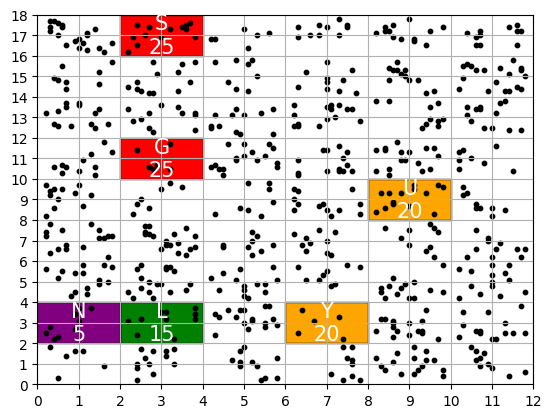

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0, map_width)
ax.set_ylim(0, map_height)

centers = []
path_coords = defaultdict(list)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
used_colors = []


for i, zone in enumerate(zones):
    x, y, width, height, color, weight = zone
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    center_x = x + width / 2
    center_y = y + height / 2
    centers.append((center_x, center_y))
    label = f"{labels[i]}\n{weight}"
    ax.text(center_x, center_y, label, ha='center', va='center', fontsize=15, color='white')


all_points = [point for row in m for cell in row for point in cell]

x_coords, y_coords = zip(*all_points)

ax.scatter(x_coords, y_coords, s=10, color='black')

grid_size = 1
ax.set_xticks(range(0, map_width + 1, grid_size))
ax.set_yticks(range(0, map_height + 1, grid_size))
ax.grid(which='both')
plt.savefig('jan.png', dpi=300, bbox_inches='tight')
files.download('jan.png')
plt.show()

In [ ]:
grid_size=1
points_grid_count = {}

for i in range(0, map_width, grid_size):
    for j in range(0, map_height, grid_size):
        grid_x_min, grid_x_max = i, i + grid_size
        grid_y_min, grid_y_max = j, j + grid_size

        count = sum(1 for point in all_points if grid_x_min <= point[0] < grid_x_max and grid_y_min <= point[1] < grid_y_max)

        points_grid_count[(i, j)] = count

values_from_dict = [i for i in list(points_grid_count.values()) if i != 0]


In [ ]:
max_count = max(points_grid_count.values())
min_count = min(points_grid_count.values())
threshold_low = min_count + (max_count - min_count) * 1 / 3
threshold_medium = min_count + (max_count - min_count) * 2 / 3

low_density_grids = {}
medium_density_grids = {}
high_density_grids = {}

for grid, count in points_grid_count.items():
    if count <= threshold_low:
        low_density_grids[grid] = count
    elif threshold_low < count <= threshold_medium:
        medium_density_grids[grid] = count
    else:
        high_density_grids[grid] = count

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

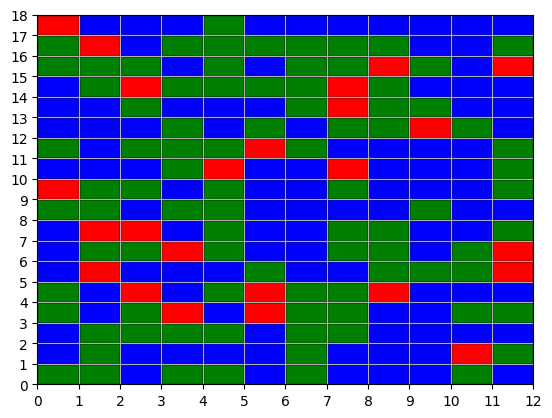

In [ ]:
def colorize_grid(map_width, map_height, low_density_grids, medium_density_grids, high_density_grids, grid_size=1):
    fig, ax = plt.subplots()
    ax.set_xlim(0, map_width)
    ax.set_ylim(0, map_height)

    for grid in low_density_grids:
        x, y = grid
        rect = patches.Rectangle((x, y), grid_size, grid_size, linewidth=1, edgecolor='black', facecolor='green')
        ax.add_patch(rect)

    for grid in medium_density_grids:
        x, y = grid
        rect = patches.Rectangle((x, y), grid_size, grid_size, linewidth=1, edgecolor='black', facecolor='blue')
        ax.add_patch(rect)

    for grid in high_density_grids:
        x, y = grid
        rect = patches.Rectangle((x, y), grid_size, grid_size, linewidth=1, edgecolor='black', facecolor='red')
        ax.add_patch(rect)

    ax.set_xticks(range(0, map_width + 1, grid_size))
    ax.set_yticks(range(0, map_height + 1, grid_size))
    ax.grid(which='both')
    plt.savefig('feb.png', dpi=300, bbox_inches='tight')
    files.download('feb.png')
    plt.show()

colorize_grid(map_width, map_height, low_density_grids, medium_density_grids, high_density_grids)


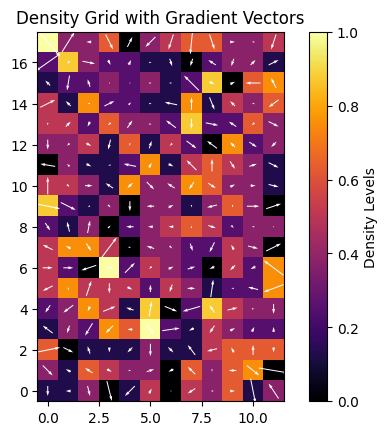

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grid_size = 1
map_width = max(x[0] for x in points_grid_count.keys()) + grid_size
map_height = max(y[1] for y in points_grid_count.keys()) + grid_size

density_grid = np.zeros((map_height, map_width))

for (x, y), count in points_grid_count.items():
    density_grid[y, x] = count

density_grid_normalized = density_grid / np.max(density_grid)

grad_y, grad_x = np.gradient(-density_grid_normalized)

X, Y = np.meshgrid(np.arange(map_width), np.arange(map_height))
plt.figure()
plt.quiver(X, Y, grad_x, grad_y, color='white',pivot = 'mid')

plt.imshow(density_grid_normalized, cmap='inferno', interpolation='nearest',origin='lower')
plt.colorbar(label='Density Levels')
plt.title('Density Grid with Gradient Vectors')
plt.show()


In [ ]:
import random
import string

def estimate_population(zones, points_grid_count, grid_size):
    population_estimates = {}
    for zone in zones:
        x, y, width, height, color, weight = zone
        population = 0
        for i in range(x, x + width, grid_size):
            for j in range(y, y + height, grid_size):
                population += points_grid_count.get((i, j), 0)
        population_estimates[zone] = population
    return population_estimates


In [ ]:
def categorize_zones(zones, population_estimates, max_capacity_factor):
    attractors = []
    repellers = []
    for zone in zones:
        x, y, width, height, color, weight = zone
        max_capacity = weight * max_capacity_factor
        current_population = population_estimates[zone]
        if current_population < max_capacity:
            attractors.append(zone + (current_population,))
        else:
            repellers.append(zone + (current_population,))
    return attractors, repellers

population_estimates = estimate_population(zones, points_grid_count, grid_size)

max_capacity_factor = 0.75

attractors, repellers = categorize_zones(zones, population_estimates, max_capacity_factor)


In [ ]:
print(f'Attractors = {attractors}\nRepellers = {repellers}')

Attractors = [(2, 16, 2, 2, 'red', 25, 13), (2, 10, 2, 2, 'red', 25, 6), (2, 2, 2, 2, 'green', 15, 10), (8, 8, 2, 2, 'orange', 20, 14), (6, 2, 2, 2, 'orange', 20, 5)]
Repellers = [(0, 2, 2, 2, 'purple', 5, 9)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

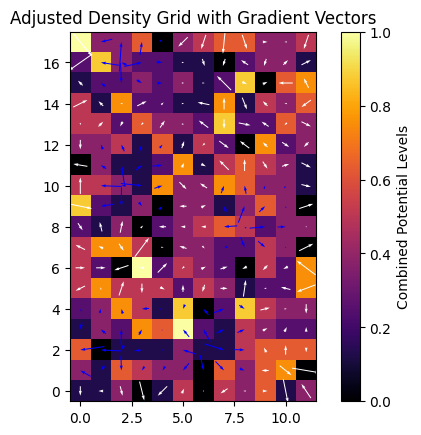

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_weighted_potential(map_width, map_height, attractors, repellers):
    potential_grid = np.zeros((map_height, map_width))

    for i in range(map_height):
        for j in range(map_width):
            potential_at_point = 0

            for attractor in attractors:
                ax, ay, _, _, _, weight, _ = attractor
                distance = np.sqrt((ax - j)**2 + (ay - i)**2)
                potential_at_point += weight / (distance + 1)


            for repeller in repellers:
                rx, ry, _, _, _, weight, _ = repeller
                distance = np.sqrt((rx - j)**2 + (ry - i)**2)
                potential_at_point -= weight / (distance + 1)


            potential_grid[i, j] = potential_at_point

    return potential_grid


def create_mask_for_zone(zone, grid_size, map_width, map_height):
    x, y, width, height, _, _, _ = zone
    mask = np.zeros((map_height, map_width), dtype=bool)


    x_min = max(x - grid_size, 0)
    y_min = max(y - grid_size, 0)
    x_max = min(x + width + grid_size, map_width)
    y_max = min(y + height + grid_size, map_height)

    mask[y_min:y_max, x_min:x_max] = True
    return mask


combined_mask = np.zeros((map_height, map_width), dtype=bool)


for zone in attractors + repellers:
    zone_mask = create_mask_for_zone(zone, grid_size, map_width, map_height)
    combined_mask = combined_mask | zone_mask


X, Y = np.meshgrid(np.arange(map_width), np.arange(map_height))

weighted_potential = calculate_weighted_potential(map_width, map_height, attractors, repellers)


combined_potential = weighted_potential - density_grid


combined_grad_y, combined_grad_x = np.gradient(-combined_potential)

U, V = combined_grad_x, combined_grad_y


U_masked = np.ma.masked_where(~combined_mask, U)
V_masked = np.ma.masked_where(~combined_mask, V)

density_grid = np.zeros((map_height, map_width))


for (x, y), count in points_grid_count.items():
    density_grid[y, x] = count


density_grid_normalized = density_grid / np.max(density_grid)


grad_y, grad_x = np.gradient(-density_grid_normalized)

X, Y = np.meshgrid(np.arange(map_width), np.arange(map_height))

first_set_mask = ~(np.ma.getmask(U_masked) & np.ma.getmask(V_masked))



grad_x_masked = np.ma.masked_where(first_set_mask, grad_x)
grad_y_masked = np.ma.masked_where(first_set_mask, grad_y)


plt.figure()

plt.quiver(X, Y, U_masked, V_masked, color='blue',pivot ='tip')

plt.quiver(X, Y, grad_x_masked, grad_y_masked, color='white',pivot = 'mid')

plt.imshow(density_grid_normalized, cmap='inferno', interpolation='nearest',origin='lower')
plt.colorbar(label='Combined Potential Levels')
plt.title('Adjusted Density Grid with Gradient Vectors')
plt.savefig('mar.png', dpi=300, bbox_inches='tight')

files.download('mar.png')
plt.show()




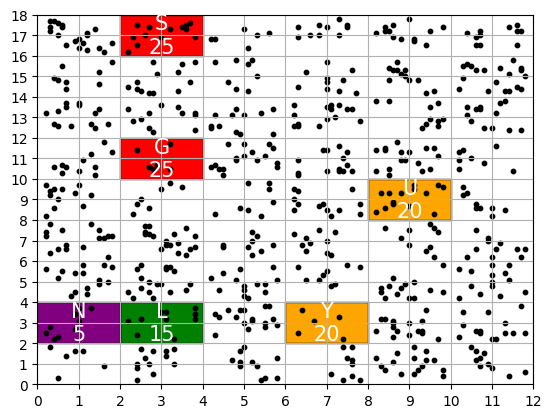

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0, map_width)
ax.set_ylim(0, map_height)

centers = []
path_coords = defaultdict(list)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
used_colors = []


for i, zone in enumerate(zones):
    x, y, width, height, color, weight = zone
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    center_x = x + width / 2
    center_y = y + height / 2
    centers.append((center_x, center_y))
    label = f"{labels[i]}\n{weight}"
    ax.text(center_x, center_y, label, ha='center', va='center', fontsize=15, color='white')


all_points = [point for row in m for cell in row for point in cell]

x_coords, y_coords = zip(*all_points)

ax.scatter(x_coords, y_coords, s=10, color='black')

grid_size = 1
ax.set_xticks(range(0, map_width + 1, grid_size))
ax.set_yticks(range(0, map_height + 1, grid_size))
ax.grid(which='both')

plt.show()

In [ ]:
print(f'Attractors = {attractors}\nRepellers = {repellers}')

Attractors = [(2, 16, 2, 2, 'red', 25, 13), (2, 10, 2, 2, 'red', 25, 6), (2, 2, 2, 2, 'green', 15, 10), (8, 8, 2, 2, 'orange', 20, 14), (6, 2, 2, 2, 'orange', 20, 5)]
Repellers = [(0, 2, 2, 2, 'purple', 5, 9)]
